# Exercise 4

Alissa Trujillo<br>
June 27, 2022<br>
DSC 530<br>
Week 4: PMF & CDF

## Exercise 3-1

In [13]:
import nsfg
import thinkstats2
import thinkplot

In [24]:
resp = nsfg.ReadFemResp()

**PMF: Actual Distribution of Number of Children Under 18**

In [20]:
numk_pmf = thinkstats2.Pmf(resp.numkdhh, label="numkdhh")
numk_pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'numkdhh')

**PMF: Biased Distribution of Number of Children Under 18**

In [21]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    
    new_pmf.Normalize()
    return new_pmf

In [23]:
numk_pmf_bias = BiasPmf(numk_pmf, "numkdhh")
numk_pmf_bias

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166}, 'numkdhh')

## Exercise 3-2

**Mean of a PMF**

In [25]:
def PmfMean(pmf):
    return sum(p * x for x, p in pmf.Items())

**Variance of a PMF**

In [26]:
def PmfVar(pmf, mu=None):
    if mu is None:
        mu = PmfMean(pmf)
    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

## Exercise 4-1

At birth I weighed {}, and I was in fact a first-born child so I will be comparing myself to the first born babies.

In [38]:
import nsfg

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
weights = firsts['totalwgt_lb']

your_weight = 3.75

**Percentile Rank Function:**

In [39]:
def PercentileRank(weights, your_weight):
    count = 0
    for weight in weights:
        if weight <= your_weight:
            count += 1
    
    percentile_rank = 100.0 * count / len(weights)
    return percentile_rank

In [40]:
my_percentile = PercentileRank(weights, your_weight)
my_percentile

2.1527305687740768

I was roughly around the 2nd percentile for birth weight in comparison with other first-born children in this study. I was born prematurely at 3 pounds 12 ounces, so this is fairly close to what I was expecting.

## Exercise 4-2

In [52]:
import numpy as np
nums = pandas.DataFrame(np.random.random(1000), columns=["Numbers"])
nums

,Numbers
0,0.051428
1,0.857682
2,0.540958
3,0.147319
4,0.625928
...,...
995,0.089242
996,0.952098
997,0.491661
998,0.551117


**Plotting the PMF**

In [53]:
nums_pmf = thinkstats2.Pmf(nums["Numbers"])

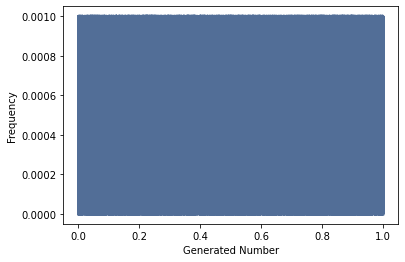

<Figure size 576x432 with 0 Axes>

In [59]:
thinkplot.Pmf(nums_pmf)
thinkplot.Show(xlabel='Generated Number', ylabel='Frequency')

The PMF created using the randomly generated numbers is entirely smooth. This is due to the fact that each of the randomly generated numbers is unique from one another, meaning that they each occur with a 1/1000 frequency as demonstrated on the graph above.

**Plotting the CDF**

In [61]:
nums_cdf = thinkstats2.Cdf(nums["Numbers"])

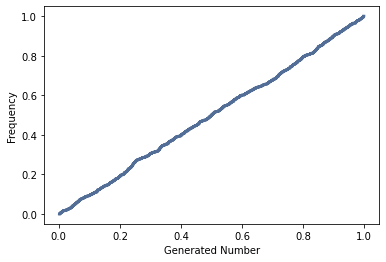

<Figure size 576x432 with 0 Axes>

In [62]:
thinkplot.Cdf(nums_cdf)
thinkplot.Show(xlabel='Generated Number', ylabel='Cumulative Frequency')

The CDF graph strengthens our conclusion that the distribution is uniform. The CDF forms a straight line from (0,0) to (1,1) meaning that the random numbers were generated in a uniform way, equally distributed between 0 and 1, by the random function.